# Title:Heart Disease Prediction

Author:[Sk Sabbir](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)\
Date: 30/1/2024\
DataSet:[Heart Disease Prediction](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)


## Aims and Objective:
we will fill this after doing exploratory Data Analysis(EDA)

### import Libraries
 Let's start the project by impopting all the libraries that we will need in this project

In [84]:
# import libraries 
#.1 to handel the data
import pandas as pd
import numpy as np 
#.2 to handel the visualization
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
#.3 to handel the preprocessing

from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
#.4import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#.05machine learning
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

#.06 for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

#.07 evalute the matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,r2_score,mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# import pipeline 
from sklearn.pipeline import Pipeline


### load the dataset

In [87]:
# way-1 load the data from csv file placed in our pc
df=pd.read_csv('./heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# Exploratry Data Analysis(EDA)

### explore each column

In [3]:
#explore the dataset of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
#data shape
df.shape

(920, 16)

In [5]:
# id columns
df['id'].min(),df['id'].max(),df['id'].nunique()


(1, 920, 920)

In [6]:
# age columns 
df['age'].min(),df['age'].max(),df['age'].nunique()

(28, 77, 50)

<Axes: xlabel='age', ylabel='Count'>

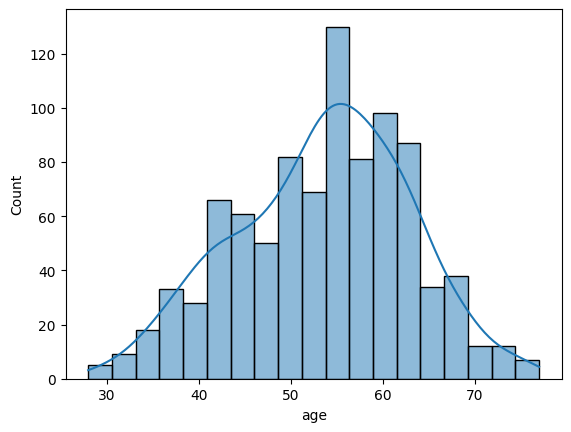

In [7]:
#draw a histogram to see the distribution of age
sns.histplot(df['age'],kde=True)

mean: 53.51086956521739
median: 54.0
mode: 54


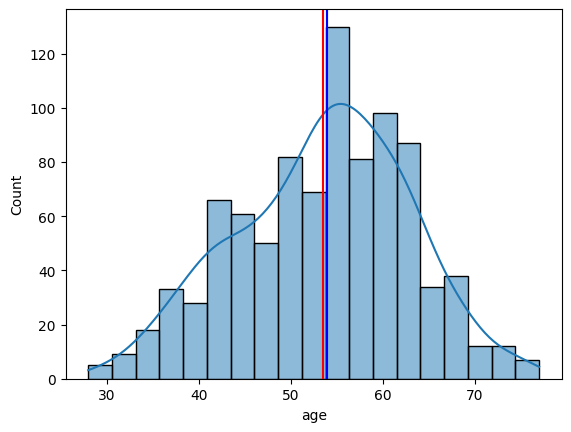

In [9]:
#plot the min , midean ,and mode using of the age column using sns 
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')




# print the value of mean, median , and mode 
print('mean:',df['age'].mean())
print('median:',df['age'].median())
print('mode:',df['age'].mode()[0])

In [10]:
# find th value of sex column 
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [11]:
# calculate the percentage of male and female value counts on data 
male_counts = 726
female_counts =194 
total_count=male_counts+female_counts

# calculate the percentage 
male_percentage =(male_counts/total_count)*100
female_percentage =(female_counts/total_count)*100
# display the result 
print('male percentage:',male_percentage)
print('female percentage:',female_percentage)

# differences 
print('male percentage - female percentage:',male_percentage-female_percentage)

male percentage: 78.91304347826087
female percentage: 21.086956521739133
male percentage - female percentage: 57.82608695652174


In [12]:
# find the value counts age column groupby sex
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

In [13]:
# lets deal with dataset column
# find the unique vale in dataset column 
df['dataset'].unique()

# calculate the value counts in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [14]:
# better plot with plotly 

fig = px.bar(x=df['dataset'].value_counts().index,y=df['dataset'].value_counts().values)
fig.show()

In [15]:
# print values count of dataset column by grouped by sex
df.groupby('sex')['dataset'].value_counts()

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

Let's explore cp (chest pain) column 


In [88]:
# value counts of cp column 
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

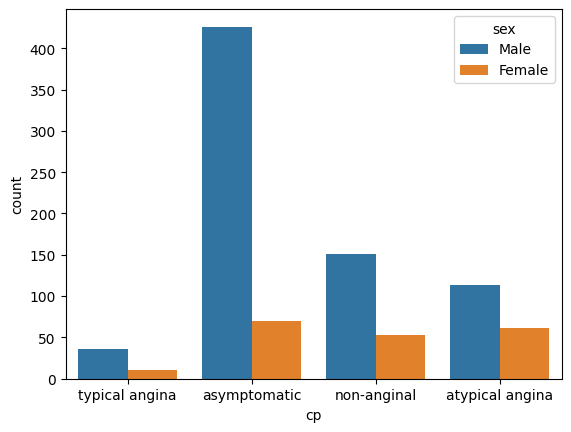

In [17]:
# count plot of cp column by sex column
sns.countplot(x=df['cp'],hue=df['sex'])


<Axes: xlabel='cp', ylabel='count'>

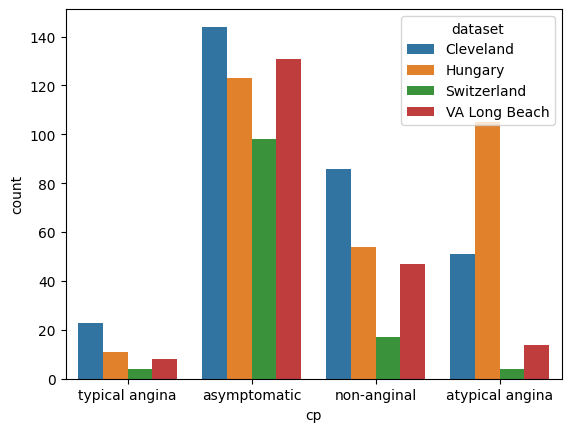

In [18]:
#count plot of cp column by dataset column
sns.countplot(x=df['cp'],hue=df['dataset'])

lets's explore the treestbps (resting blood pressure )column:
the normal resting blood pressure is 120/80mm hg

Write here,what will happen if the blood pressure is high or low then you can been the values based on those values 


In [19]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### Dealing with missing values 

In [27]:

missing_data_cols=df.isnull().sum()[df.isnull().sum()> 0].index.tolist()

missing_data_cols


['trestbps', 'chol', 'thalch', 'oldpeak']

In [21]:
categorical_cols=['thal','ca','slope','exang','fbs','restecg','cp','sex','num']
bool_cols=['fbs','exang']
numeric_cols=['age','trestbps','chol','thalch','oldpeak']

In [23]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [33]:
def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")  
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass 
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]  

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]           

In [36]:
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# Dealling with outliers 

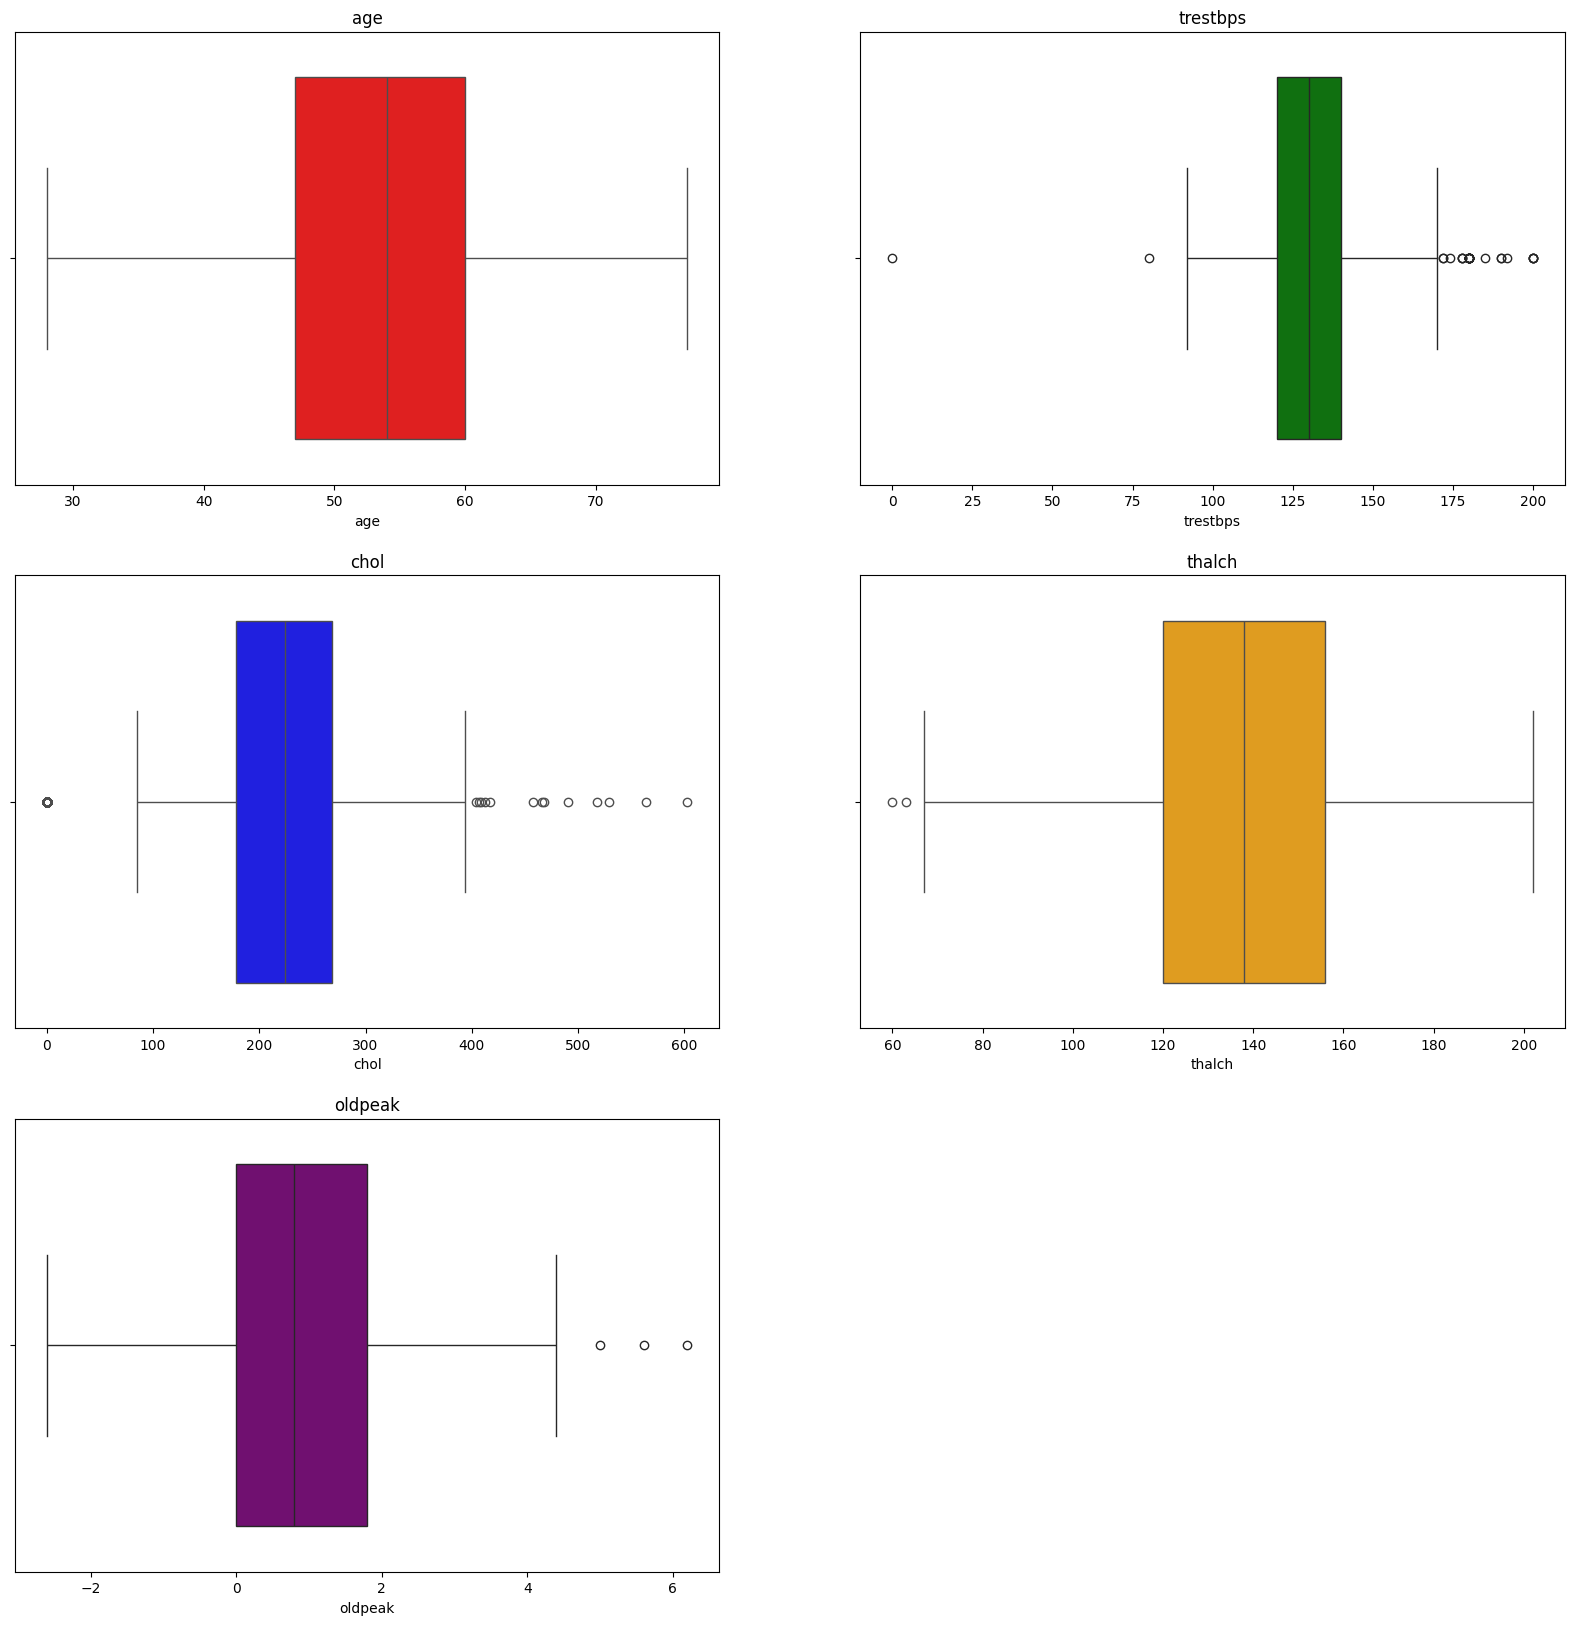

In [37]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [39]:
# so my observation with trestbps column no more pepole have 0 trestbps thats why remove this row 
df[df['trestbps'] == 0]
# remove this row:
df = df.drop(df[df['trestbps'] == 0].index)

print("So The number of row after removing 0 from the column trestbps are:)",df.shape)

So The number of row after removing 0 from the column trestbps are:) (919, 16)


In [42]:
#Check duplicates:
print('The number of duplicates in the dataset:', df.duplicated().sum())

The number of duplicates in the dataset: 0


# Finally we are going to using ML model 
Selecting the target column:

The "num" column represents the stages of heart disease. Therefore, it will be treated as the target variable, and predictions for the "num" variable will be made based on the information from other columns.

num:

0 : 411

1 : 265

2 : 109

3 : 106
4 : 28

Name: count, dtype: int64

The Target Column is num which is the predicted attribute. We will use this column to predict the heart disease. The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.

0 = no heart disease

1 = mild heart disease

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease

In [45]:
#Scaling the numeric columns using  min max-scallar 
numeric_cols=['age', 'trestbps', 'chol',  'oldpeak']
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [50]:
# encoding the categorical column

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'dataset','ca', 'thal','num']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [51]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.541667,0.386401,1,0,150.0,0,0.556818,0,0,0,0
1,2,0.795918,1,0,0,0.666667,0.474295,0,0,108.0,1,0.465909,1,3,1,2
2,3,0.795918,1,0,0,0.333333,0.379768,0,0,129.0,1,0.590909,1,2,2,1
3,4,0.183673,1,0,2,0.416667,0.414594,0,1,187.0,0,0.693182,0,0,1,0
4,5,0.265306,0,0,1,0.416667,0.338308,0,0,172.0,0,0.454545,2,0,1,0


In [52]:
# split the data into training and testing
X = df.drop('num', axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# create a pipeline using all the models 
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42)),
    ("SVC", SVC(random_state=42)),
    ("KNN", KNeighborsClassifier())
]

best_model=None
best_accuracy=0

## Iterate over the models and evaluate their performance
for name ,model in models:
    # create a pipeline with the model and evaluate its performance
    pipeline =Pipeline([
    
        ('model', model)
    ])
    # perform cross validation
    scores=cross_val_score(pipeline, X_train, y_train, cv=5)
    # compute the mean accuracy
    mean_squared_erroraccuracy = scores.mean()
    #fit the pipeline on the training data 
    pipeline.fit(X_train, y_train)
    # predict on the test data
    y_pred = pipeline.predict(X_test)
    # calculate the accuracy score 
    accuracy=accuracy_score(y_test, y_pred)
    # print the performance metrics
    print(f"Model: {name}, Accuracy: {accuracy}")
    print(f"Mean Squared Error: {mean_squared_erroraccuracy}")
    print(f"Cross Validation Scores: {scores}")
    print(f"Mean Accuracy: {mean_squared_erroraccuracy}")
    print("Test Accuracy:", accuracy)
    # compare the accuracy with the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

# print the best model
print(f"Best Model: {best_model}, Accuracy: {best_accuracy}")


    
        

Model: Logistic Regression, Accuracy: 0.5597826086956522
Mean Squared Error: 0.6149659863945579
Cross Validation Scores: [0.60544218 0.57823129 0.61904762 0.62585034 0.6462585 ]
Mean Accuracy: 0.6149659863945579
Test Accuracy: 0.5597826086956522
Model: Decision Tree, Accuracy: 0.6304347826086957
Mean Squared Error: 0.5959183673469388
Cross Validation Scores: [0.63265306 0.55102041 0.60544218 0.58503401 0.60544218]
Mean Accuracy: 0.5959183673469388
Test Accuracy: 0.6304347826086957
Model: Random Forest, Accuracy: 0.6521739130434783
Mean Squared Error: 0.6789115646258503
Cross Validation Scores: [0.71428571 0.68707483 0.67346939 0.63945578 0.68027211]
Mean Accuracy: 0.6789115646258503
Test Accuracy: 0.6521739130434783
Model: XGBoost, Accuracy: 0.6521739130434783
Mean Squared Error: 0.6598639455782312
Cross Validation Scores: [0.67346939 0.65306122 0.65986395 0.66666667 0.6462585 ]
Mean Accuracy: 0.6598639455782312
Test Accuracy: 0.6521739130434783
Model: SVC, Accuracy: 0.5815217391304348

In [109]:
#save the model
import pickle
pickle.dump(best_model, open('01_heart_disease_prediction.pkl', 'wb'))

### outputs:
1. The minimum age to have a heart disease 28 years old 
2. Most of the pepole  get heart disease at the age of 53 to 54 
3. 